# Project: Netflix Movies & TV shows Analysis

Objectives:

### 1. data Exploration

#### 1.1: Installing & importing the necessnary Libraraies

In [53]:
# installing the libraries
# pip install numpy, pandas, seaborn, matplotlib

In [54]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1.2: Loading & viewing the datasetm

In [55]:
#Loading the dataset 
df = pd.read_csv("netflix_titles.csv")

# viewing the first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### 1.3: checking the basic dataset info

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [57]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### observation about dataset:

dataset has 8807 rows and 12 columns

Checking the duplicates 

Convert date_added to proper datetime format.

Extract year_added and month_added for time-based analysis.

Handled missing values:

rating → "Unknown"

director, cast → "Not Available"

country → "Unknown"

Created a content_type column (to distinguish Movies & TV Shows).

Fixed duration column:

Converted TV Show seasons to numeric values.

Filled missing values.

Saved cleaned dataset as netflix_cleaned.csv

### 2. Data cleaning & proprocessing

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [59]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='mixed', errors='coerce')


##### Explanation:
str.strip() → Removes leading/trailing spaces causing the issue.

format='mixed' → Pandas automatically detects different formats.

errors='coerce' → Converts problematic values to NaT (null) instead of crashing.

In [60]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])


In [61]:
# verifying the datatype
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [62]:
# Fill missing values
df['rating'].fillna("Unknown", inplace=True)
df['director'].fillna("Not Available", inplace=True)
df['cast'].fillna("Not Available", inplace=True)
df['country'].fillna("Unknown", inplace=True)

C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_6012\1572709210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna("Unknown", inplace=True)
C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_6012\1572709210.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [63]:
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)


C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_6012\1893020897.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)


In [64]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [65]:
# Drop unnecessary columns (Optional)
df.drop(columns=['show_id', 'description'], inplace=True)  # Keeping only relevant columns


In [69]:
# Extract Year & Month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [67]:
# Convert 'duration' column into numeric values
def convert_duration(value):
    if 'min' in value:
        return int(value.replace(" min", ""))
    elif 'Season' in value:
        return int(value.split(" ")[0])  # Extract number of seasons
    return 0  # Handle unexpected values

In [71]:
# Normalize 'duration' column
df['duration'] = df['duration'].fillna("0 min")  # Fill NaN values


In [73]:
# Create 'content_type' column (Movie or TV Show)
df['content_type'] = df['type'].apply(lambda x: "Movie" if x == "Movie" else "TV Show")


In [75]:
# Convert 'duration' column into numeric values
def convert_duration(value):
    if 'min' in value:
        return int(value.replace(" min", ""))
    elif 'Season' in value:
        return int(value.split(" ")[0])  # Extract number of seasons
    return 0  # Handle unexpected values

df['duration'] = df['duration'].apply(convert_duration)


In [77]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
year_added      0
month_added     0
content_type    0
dtype: int64

In [79]:
# Save cleaned dataset
df.to_csv("netflix_cleaned.csv", index=False)


In [80]:
# Display final dataset info
print("\n✅ Data Cleaning Completed!")
print(df.info())
print("\nCleaned dataset saved as 'netflix_cleaned.csv'.")


✅ Data Cleaning Completed!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   cast          8807 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8807 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   int64         
 9   listed_in     8807 non-null   object        
 10  year_added    8807 non-null   int32         
 11  month_added   8807 non-null   int32         
 12  content_type  8807 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(2), object(8)
memory usage: 825.8+ KB
None

Cleaned dataset saved as 'ne

#### Key Fixes & Improvements:
✅ Handled date_added missing values and extracted year_added & month_added.

✅ Refined duration column:

Convert minutes into numeric values.

Convert "1 Season", "2 Seasons" into numbers.

✅ Dropped unnecessary columns (show_id and description to keep the dataset concise).

✅ Created a new column content_type to clearly separate Movies vs. TV Shows.



### 3: Exploratory Data Analysis (EDA)

now We Will Do in EDA:

3.1 Basic Statistics & Overview

Check the distribution of movie vs TV shows

Most common genres

Most active directors & actors

Number of releases per year

3.2 Trend Analysis

How many titles are added each year?

Which country produces the most content?

Distribution of ratings (G, PG, R, etc.)

Duration trends of movies and TV shows



In [82]:
# Load cleaned data
df = pd.read_csv("Netflix_cleaned.csv")

df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,content_type
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90,Documentaries,2021,9,Movie
1,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",2021,9,TV Show
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",2021,9,TV Show
3,TV Show,Jailbirds New Orleans,Not Available,Not Available,Unknown,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV",2021,9,TV Show
4,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",2021,9,TV Show


In [83]:
# Set style
sns.set(style="whitegrid")


C:\Users\FINE LAPTOP\AppData\Local\Temp\ipykernel_6012\2676605531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="coolwarm")


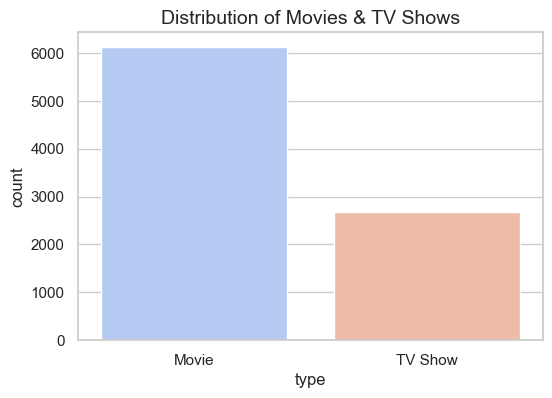

In [84]:
## 1. Movie vs TV Show Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="type", palette="coolwarm")
plt.title("Distribution of Movies & TV Shows", fontsize=14)
plt.show()

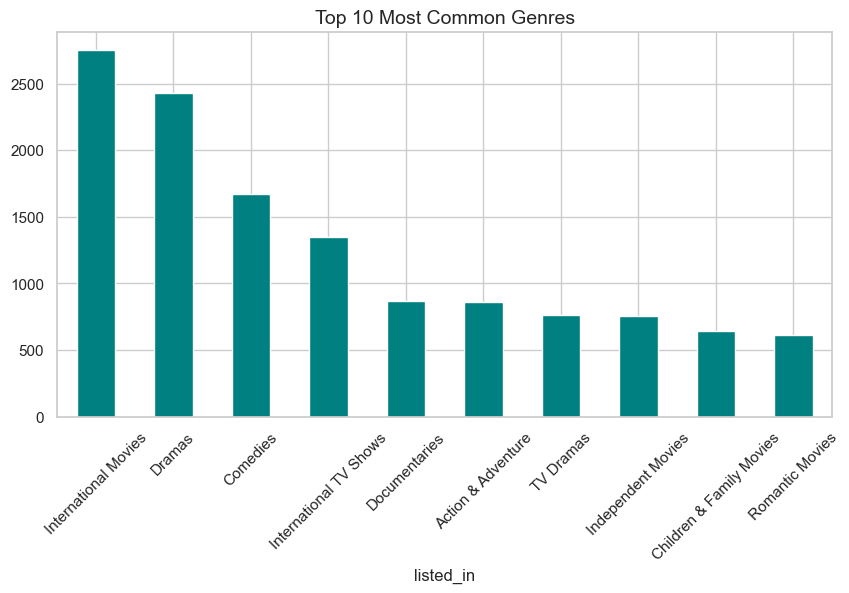

In [85]:
## 2. Top 10 Most Common Genres
plt.figure(figsize=(10, 5))
df['listed_in'].str.split(', ').explode().value_counts()[:10].plot(kind='bar', color='teal')
plt.title("Top 10 Most Common Genres", fontsize=14)
plt.xticks(rotation=45)
plt.show()